## Problema do Negócio

Fonte: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

Um gerente do banco está incomodado com cada vez mais clientes deixando seus serviços de cartão de crédito. Eles realmente apreciariam se alguém pudesse prever para eles quem será desligado, para que possam ir proativamente ao cliente para fornecer melhores serviços e direcionar as decisões dos clientes na direção oposta

Obtive esse conjunto de dados de um site com a URL https://leaps.analyttica.com/home. Eu tenho usado isso por um tempo para obter conjuntos de dados e, consequentemente, trabalhar neles para produzir resultados frutíferos. O site explica como resolver um determinado problema de negócios.

Agora, esse conjunto de dados consiste em 10.000 clientes mencionando sua idade, salário, estado civil, limite do cartão de crédito, categoria do cartão de crédito etc. Existem quase 18 recursos.

Temos apenas 16,07% de clientes que desistiram. Portanto, é um pouco difícil treinar nosso modelo para prever a rotatividade de clientes.

## Análise Estatística

In [ ]:
# Bibliotecas para visualização
import pandas as pd

In [ ]:
folder = '/content/drive/MyDrive/Data Science/Estudo/Machine Learn/Evasao/01_evasao_bancaria/'
origem = f'{folder}BankChurners.csv'
df = pd.read_csv(origem)

In [ ]:
# Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
# Remoção do ID do cliente E algoritmos de Naive_Bayes que podem tornar o algoritmo pretensioso
lista = [
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
df.drop(columns = lista, inplace = True)

In [ ]:
# Verificando Missings
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
# Verificando Target
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# Trocando a Flag para numérico
flag = {'Existing Customer': 0, 'Attrited Customer': 1}

df['Attrition_Flag'] = df['Attrition_Flag'].map(flag)

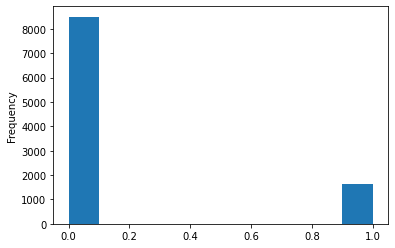

In [ ]:
df['Attrition_Flag'].plot(kind = 'hist');

## Manipulação de Dados

In [ ]:
# Biblioteta para balanceamento
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Rebalanceando com oversampling para representar 1/3 do conjunto de dados
df_original = df
X = df.drop(columns = 'Attrition_Flag')
y = df['Attrition_Flag']

oversample = RandomOverSampler(sampling_strategy=0.5)
X, y = oversample.fit_resample(X, y)

df = X
df['Attrition_Flag'] = y

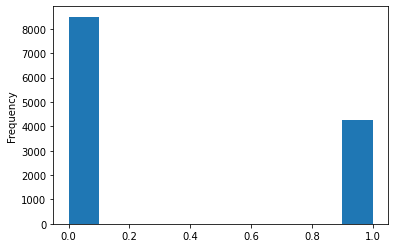

In [ ]:
# Observando a Target Balanceada
df['Attrition_Flag'].plot(kind = 'hist');

## Seleção de Máquinas

In [ ]:
# Instalação do Pycaret
# !pip install scikit-learn==0.23.2
# !pip install pycaret -q

In [ ]:
# Importando Pycaret.classification
from pycaret.classification import *

Foi iniciado a pipeline com remoção automática de multicolinearidade e variáveis com baixa variância.

O próprio Pycaret tem a opção de fazer rebalanceamento, mas preferi deixar desativado e fazer anteriormente

In [ ]:
s = setup(df, target='Attrition_Flag', remove_multicollinearity=True, ignore_low_variance=True)

,Description,Value
0,session_id,1430
1,Target,Attrition_Flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10127, 20)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Attrition_Flag',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('dummy', Dummify(target='Attrition_Flag')),
                ('fix_perfect', Remove_100(target='Attrition_Flag')),
     

- Uma lista de algoritmos foi criada, treinada e submetida a teste em validação cruzada.

- A ordem de importância dos algoritmos foi pela métrica F1

In [ ]:
best = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9733,0.9941,0.8872,0.9436,0.9143,0.8985,0.8993,0.333
gbc,Gradient Boosting Classifier,0.9636,0.9890,0.8343,0.9317,0.8798,0.8584,0.8606,1.474
ada,Ada Boost Classifier,0.9558,0.9847,0.8281,0.8890,0.8568,0.8308,0.8319,0.391
rf,Random Forest Classifier,0.9458,0.9848,0.7215,0.9238,0.8096,0.7786,0.7870,0.591
dt,Decision Tree Classifier,0.9391,0.8820,0.7981,0.8199,0.8078,0.7716,0.7724,0.098
lda,Linear Discriminant Analysis,0.9100,0.9283,0.6156,0.7778,0.6862,0.6345,0.6411,0.099
et,Extra Trees Classifier,0.9156,0.9646,0.5141,0.9271,0.6603,0.6167,0.6523,0.808
nb,Naive Bayes,0.8963,0.8866,0.6199,0.7016,0.6568,0.5961,0.5986,0.033
lr,Logistic Regression,0.9001,0.9132,0.5416,0.7669,0.6328,0.5772,0.5900,0.543
knn,K Neighbors Classifier,0.8931,0.8775,0.5625,0.7107,0.6262,0.5649,0.5712,0.139


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1430, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


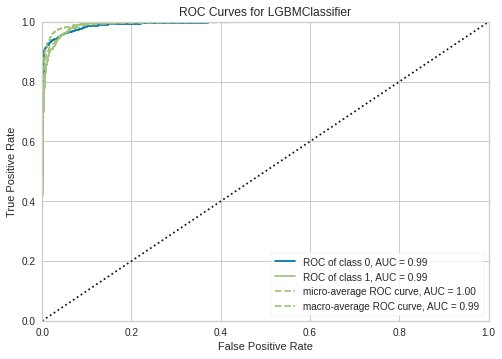

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Avaliando curva AUC
plot_model(best, plot = 'auc')

In [ ]:
# Previsões
predict_model(best)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1430, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.971,0.9924,0.8986,0.921,0.9097,0.8924,0.8925


,Customer_Age,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,...,Contacts_Count_12_mon_0,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6,Attrition_Flag,Label,Score
0,55.0,46.0,0.0,4178.000000,0.882,7914.0,54.0,0.862,0.000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9686
1,57.0,51.0,0.0,1438.300049,0.733,2607.0,37.0,0.609,0.000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9988
2,44.0,36.0,0.0,19430.000000,1.012,3650.0,80.0,0.633,0.000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9985
3,59.0,54.0,2396.0,395.000000,0.889,2658.0,43.0,0.344,0.858,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9967
4,41.0,34.0,1291.0,12244.000000,0.653,1028.0,21.0,1.625,0.095,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,46.0,27.0,2297.0,8634.000000,0.639,4802.0,73.0,0.872,0.210,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9993
3035,49.0,41.0,2138.0,5913.000000,0.716,4370.0,83.0,0.886,0.266,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9998
3036,53.0,36.0,2472.0,2281.000000,1.274,2242.0,49.0,0.815,0.520,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9982
3037,52.0,44.0,666.0,872.000000,0.642,4808.0,64.0,0.684,0.433,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9994


In [ ]:
# Tunagem de modelo com 50 repetições
model_turbo = tune_model(best, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9765,0.9977,0.9731,0.9914,0.9822,0.9477,0.9480
1,0.9843,0.9991,0.9798,0.9966,0.9881,0.9651,0.9654
2,0.9787,0.9972,0.9781,0.9898,0.9839,0.9525,0.9527
3,0.9877,0.9981,0.9899,0.9916,0.9907,0.9724,0.9724
4,0.9731,0.9968,0.9764,0.9831,0.9797,0.9397,0.9398
5,0.9753,0.9965,0.9815,0.9815,0.9815,0.9446,0.9446
6,0.9821,0.9986,0.9832,0.9898,0.9865,0.9598,0.9599
7,0.9787,0.9979,0.9832,0.9848,0.9840,0.9522,0.9522
8,0.9776,0.9959,0.9764,0.9898,0.9831,0.9499,0.9501


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 8
INFO:logs:LGBMClassifier(bagging_fraction=0.7, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=61, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=270, n_jobs=-1, num_leaves=50, objective=None,
               random_state=8065, reg_alpha=0.15, reg_lambda=0.1, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
# Validações de teste
predict_model(model_turbo)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.7, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=61, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=270, n_jobs=-1, num_leaves=50, objective=None,
               random_state=8065, reg_alpha=0.15, reg_lambda=0.1, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9872,0.9986,0.9848,0.9961,0.9904,0.9712,0.9714


,Customer_Age,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,...,Contacts_Count_12_mon_0,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6,Attrition_Flag,Label,Score
0,44.0,36.0,0.0,1684.0,0.557,2275.0,45.0,0.607,0.000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Attrited Customer,Attrited Customer,0.9959
1,65.0,56.0,0.0,6184.0,1.016,1712.0,27.0,0.286,0.000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Attrited Customer,Attrited Customer,0.9340
2,59.0,53.0,0.0,14979.0,0.710,530.0,10.0,1.000,0.000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Attrited Customer,Attrited Customer,0.9930
3,49.0,32.0,2517.0,16067.0,0.703,1330.0,34.0,1.125,0.135,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Existing Customer,Existing Customer,0.9986
4,53.0,43.0,0.0,6058.0,0.997,4754.0,60.0,0.463,0.000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Attrited Customer,Attrited Customer,0.9804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,40.0,31.0,2203.0,32313.0,0.728,14204.0,96.0,0.920,0.064,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,Existing Customer,0.9988
3822,55.0,37.0,1969.0,407.0,0.788,4301.0,79.0,1.026,0.829,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,Existing Customer,0.9998
3823,55.0,41.0,2408.0,32108.0,0.796,1187.0,40.0,0.600,0.070,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Attrited Customer,Attrited Customer,0.8055
3824,55.0,36.0,572.0,1264.0,0.758,2400.0,34.0,0.789,0.312,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Attrited Customer,Attrited Customer,0.9861


## Salvando o modelo

- Foi escolhido como modelo preditivo o Light Gradient Boosting Machine	com hiper parâmetros escolhidos pela máquina através de várias combinações testadas.

In [ ]:
save_point = f'{folder}lgb_churn_v1'
save_model(model_turbo, save_point)

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=0.7, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=61, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=270, n_jobs=-1, num_leaves=50, objective=None,
               random_state=8065, reg_alpha=0.15, reg_lambda=0.1, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=/content/drive/MyDrive/Data Science/Estudo/Machine Learn/Evasao/01_evasao_bancaria/lgb_churn_v1, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                    

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Attrition_Flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                                 colsample_bytree=1.0, feature_fraction=0.6,
                                 importance_type='split', learning_rate=0.05,
                                 max_depth=-1, min_child_samples=61,
           